## Standardization & Normalization

- **Transformation is a highly essential step required for any data science project. There is a significant boost in terms of performance of a model from transformation.**

- For eg, **Linear Regression**, internal concept of **Gradient Decent** is used to determine the **Global Minima**. Where the objective is to identify the coefficient slopes/parameters which helps smoother derivition.

- **KNN**, works of Euclidian distance which tries to find the nearest points to either classify or solve regression problems. **K-Means/Heirarchical Clustering** also uses Eucledian distance. 

- **Every points have direction and vector.**

- **Scaling** will be performed in order to make the processing much faster. An eg of such scaling includes **MinMax/Standard Scaler**.

- On the other hand, for Tree/Ensemble based techniques, transformation is not necessarily require.

- For Deep Learning Techniques such as **ANN, CNN, or RNN** **`scaling, standardization or normalization`** is also a must.

### Types of Transformation

1. Normalisation and Standardization
2. Scaling to Minimum and Maximum Values
3. Scaling to Median and Quantiles
4. Gaussian Transformation
     - a. Logarithmic Transformation
     - b. Reciprocal Transformation
     - c. Square Root Transformation
     - d. Exponential Transformation
     - e. Box Cox Transformation

In [13]:
# importing the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Creating dataframe

df = pd.read_csv("F:\\Machine Learning\\INeuron_FSDS\\Practice EDA\\Dataset\\titanic.csv",
                 usecols=['Pclass', 'Age', 'Fare', 'Survived'])

df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


### 1. Standardization

- Where all features and variables are brought to a similar scale. By centering the variables at zero.

- **`z = (x - (x_mean))/std`**

In [15]:
# Checking number of null values

df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

**Here it is not a good practice to fill all the null values with a Mean or Median or Mode of the Age**

In [16]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [17]:
#Performing standardization
#Using StandardScaler from Scikit-Learn

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

#### Fit and Fit_Transform


**fit**	                                      
- Used for training	                            

**fit_transform**
- When data is required to modified where the features are 'transformed'

In [18]:
df_scaled = scalar.fit_transform(df)
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [9]:
# Creating a dataframe of scaled version

df1 = pd.DataFrame(df_scaled)
df1

,0,1,2,3
0,-0.789272,0.827377,-0.530377,-0.502445
1,1.266990,-1.566107,0.571831,0.786845
2,1.266990,0.827377,-0.254825,-0.488854
3,1.266990,-1.566107,0.365167,0.420730
4,-0.789272,0.827377,0.365167,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.185937,-0.386671
887,1.266990,-1.566107,-0.737041,-0.044381
888,-0.789272,0.827377,NaN,-0.176263
889,1.266990,-1.566107,-0.254825,-0.044381


Here the transformation is taking placed based on each distinct field

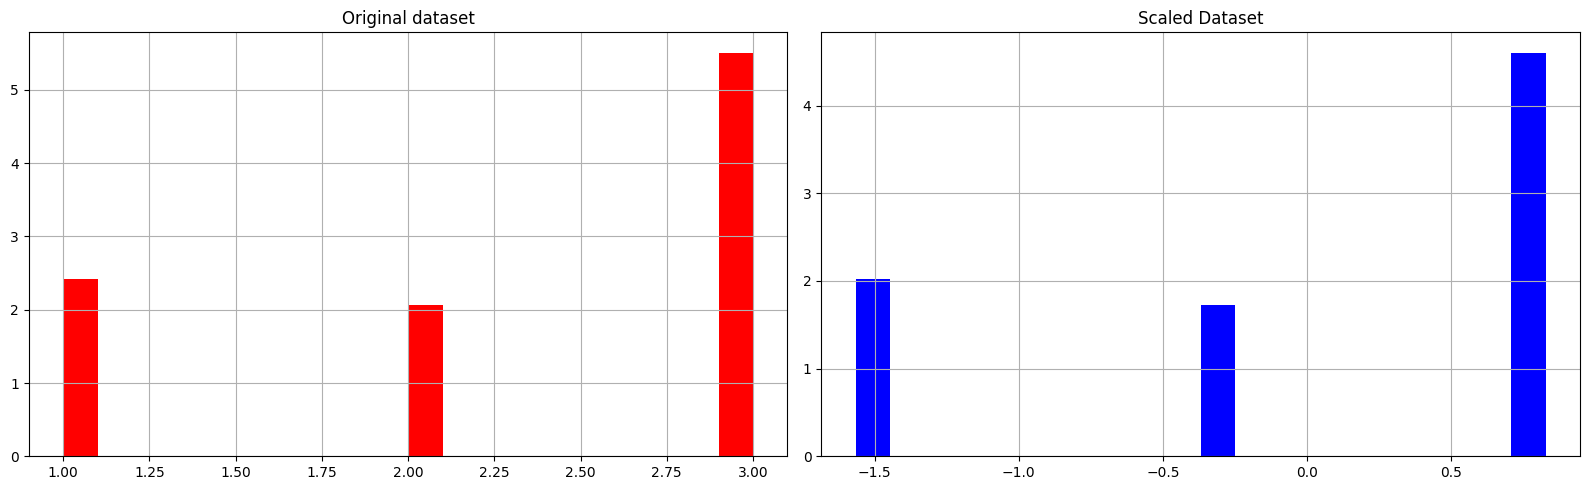

In [19]:
# Creating Histograms of 'Pclass' and it's scaled version

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
df['Pclass'].hist(bins=20, density=True, color='red')
plt.title("Original dataset")
plt.subplot(1,2,2)
df1.loc[:, 1].hist(bins=20, density=True, color='blue')
plt.title("Scaled Dataset")
plt.tight_layout()

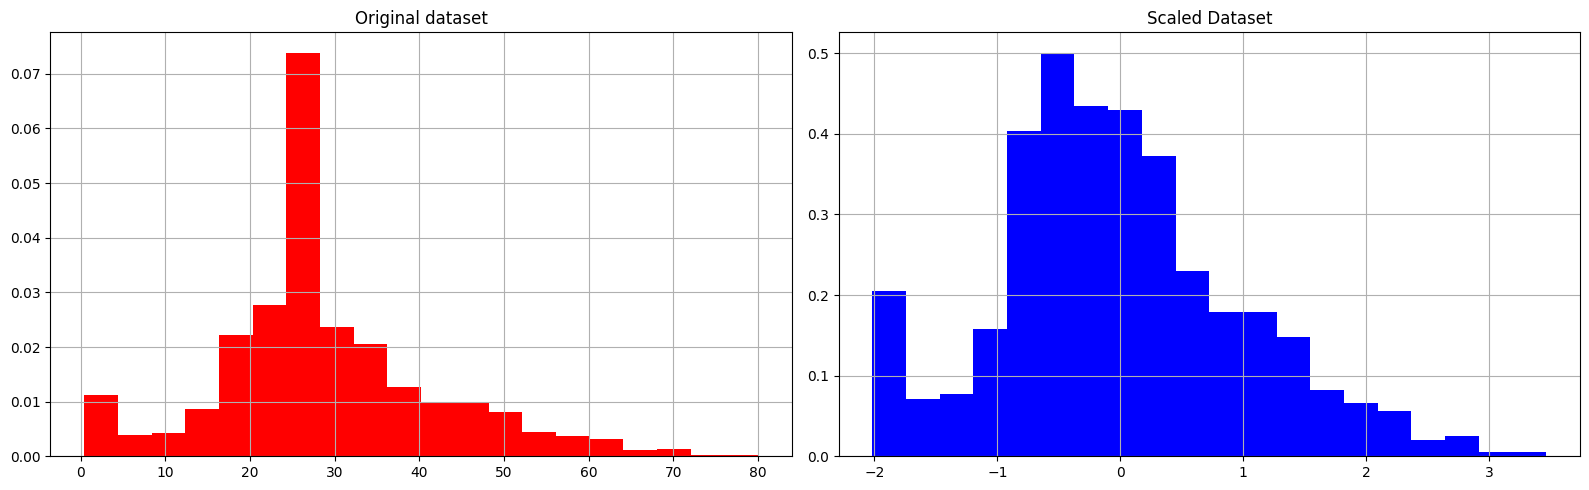

In [20]:
# Creating Histograms of 'Age' and it's scaled version

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
df['Age'].hist(bins=20, density=True, color='red')
plt.title("Original dataset")
plt.subplot(1,2,2)
df1.loc[:, 2].hist(bins=20, density=True, color='blue')
plt.title("Scaled Dataset")
plt.tight_layout()

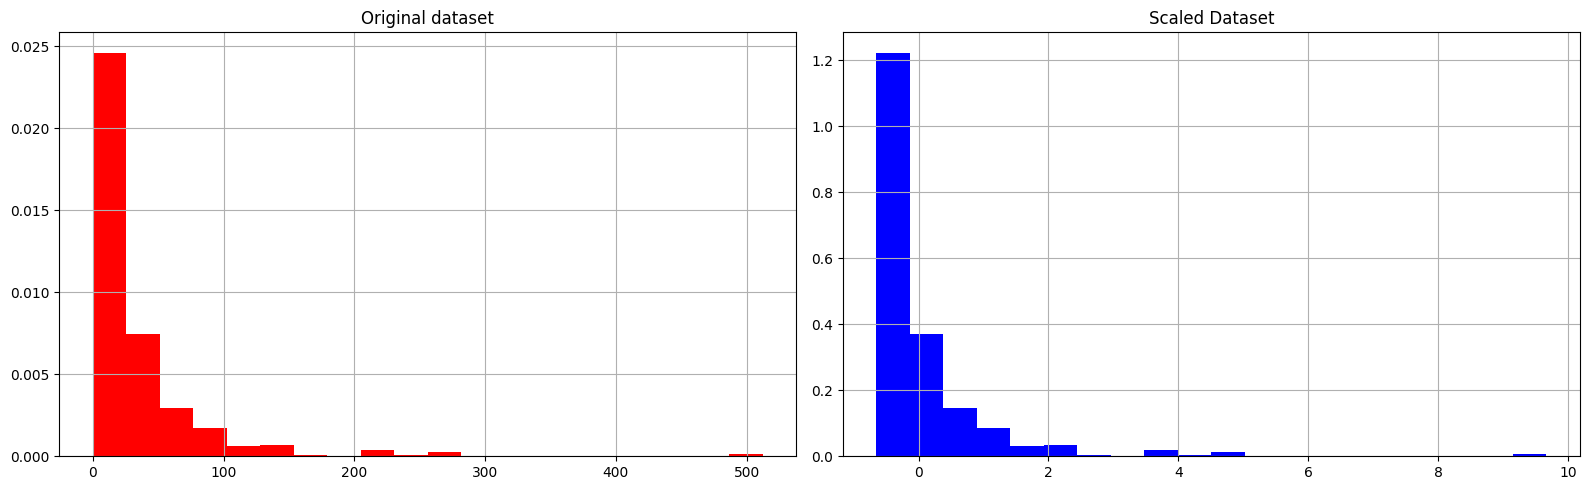

In [21]:
# Creating Histograms of 'Fare' and it's scaled version

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
df['Fare'].hist(bins=20, density=True, color='red')
plt.title("Original dataset")
plt.subplot(1,2,2)
df1.loc[:, 3].hist(bins=20, density=True, color='blue')
plt.title("Scaled Dataset")
plt.tight_layout()

### 2. MinMax Scaling

- Aim of this scaling is to transform/scale the values between 0 to 1 / 0 and 1. Works well with DL techniques such as CNN.

- **`X_scaled = ((X - X.min) / (X.max-X.min))`**

In [22]:
# importing the library

from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [23]:
# Creating minmax dataframe of the original dataframe

df_min_max = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)
df_min_max

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


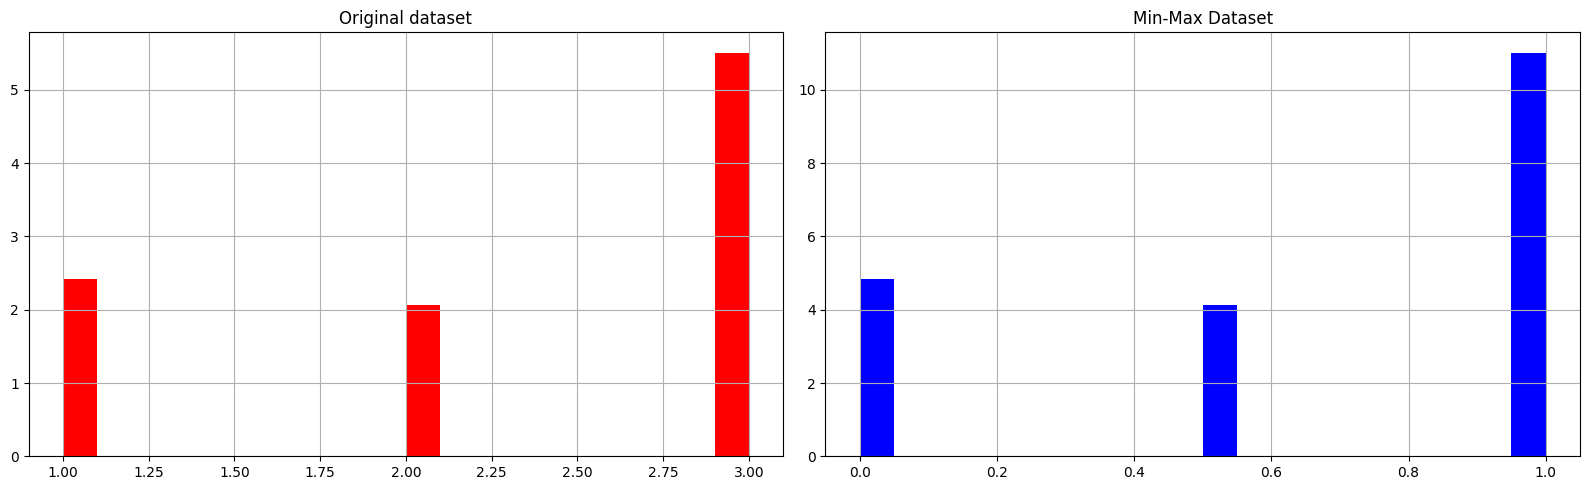

In [26]:
# Creating Histograms of 'Pclass' and it's min_max version

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
df['Pclass'].hist(bins=20, density=True, color='red')
plt.title("Original dataset")
plt.subplot(1,2,2)
df_min_max['Pclass'].hist(bins=20, density=True, color='blue')
plt.title("Min-Max Dataset")
plt.tight_layout()

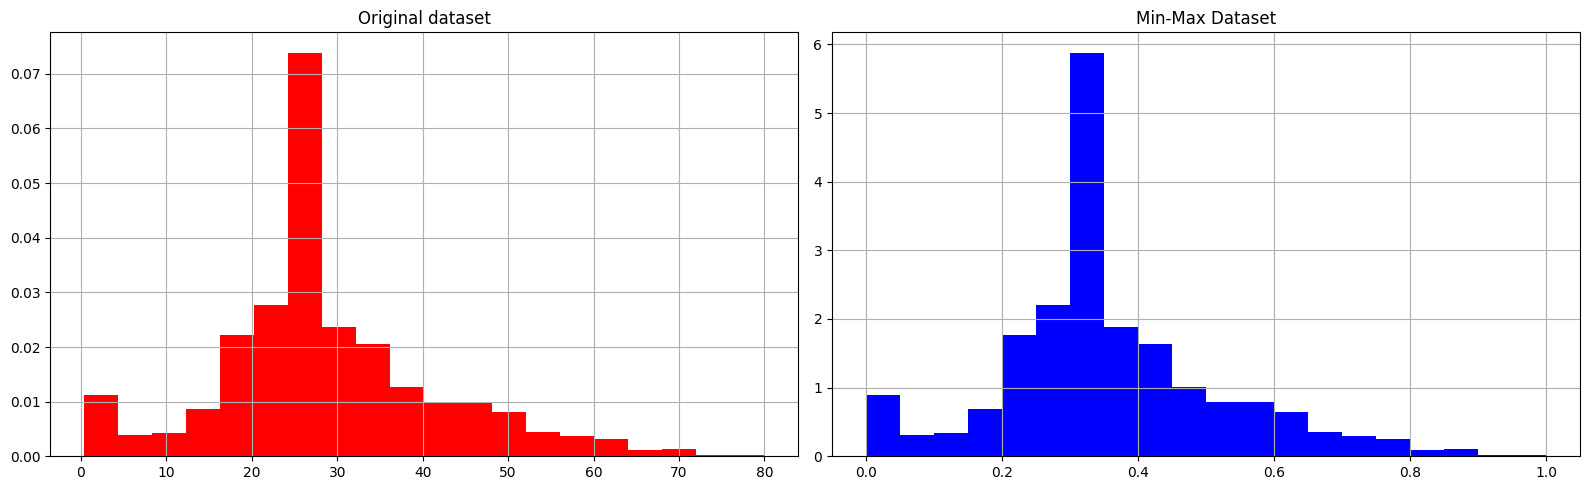

In [27]:
# Creating Histograms of 'Age' and it's min_max version

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
df['Age'].hist(bins=20, density=True, color='red')
plt.title("Original dataset")
plt.subplot(1,2,2)
df_min_max['Age'].hist(bins=20, density=True, color='blue')
plt.title("Min-Max Dataset")
plt.tight_layout()

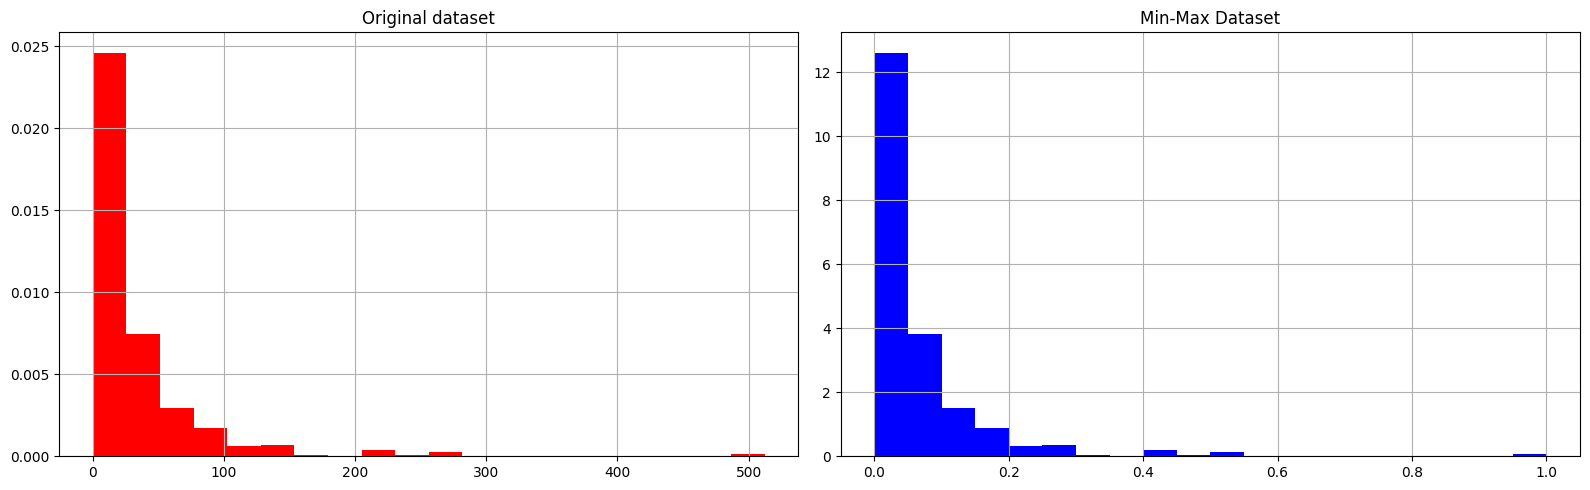

In [28]:
# Creating Histograms of 'Fare' and it's min_max version

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
df['Fare'].hist(bins=20, density=True, color='red')
plt.title("Original dataset")
plt.subplot(1,2,2)
df_min_max['Fare'].hist(bins=20, density=True, color='blue')
plt.title("Min-Max Dataset")
plt.tight_layout()

### 3. Robust Scaler

- Used to scale features according to **median and quantiles (IQR)**. Best in presence of outliers.

- **`IQR = Q3 - Q1 X_scaled = (X-X.median)/IQR`**

In [29]:
# importing the library

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [30]:
# Creating Robust Scaler dataset

df_robust_scaler = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
df_robust_scaler

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


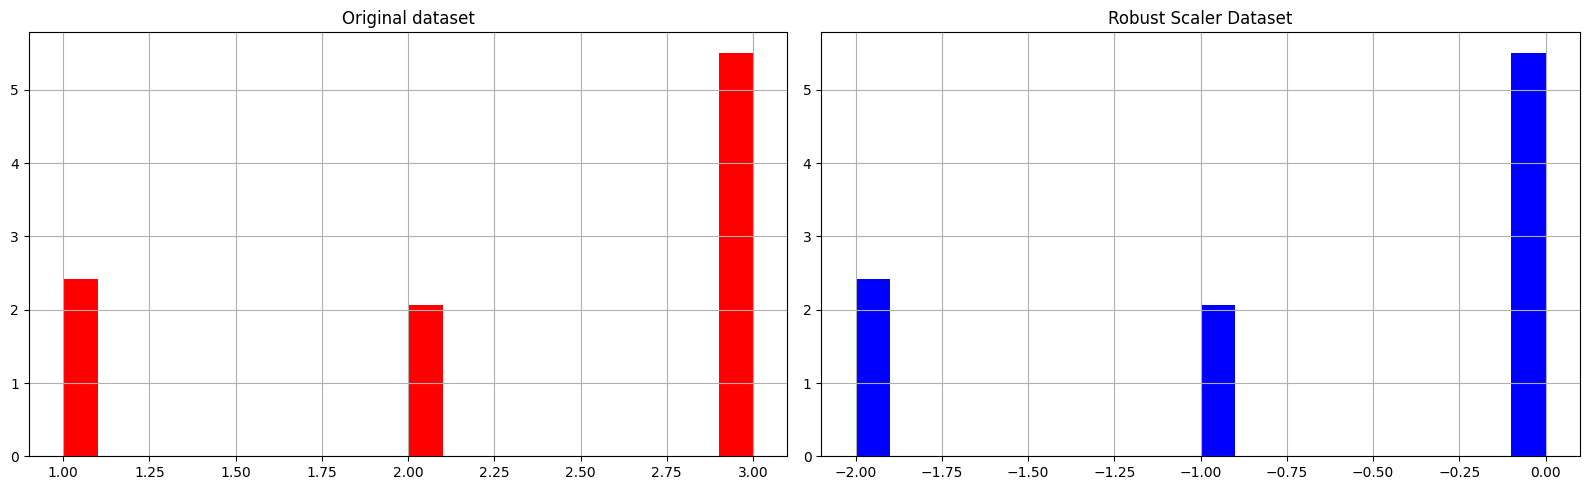

In [31]:
# Creating Histograms of 'Pclass' and it's Robust version

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
df['Pclass'].hist(bins=20, density=True, color='red')
plt.title("Original dataset")
plt.subplot(1,2,2)
df_robust_scaler['Pclass'].hist(bins=20, density=True, color='blue')
plt.title("Robust Scaler Dataset")
plt.tight_layout()

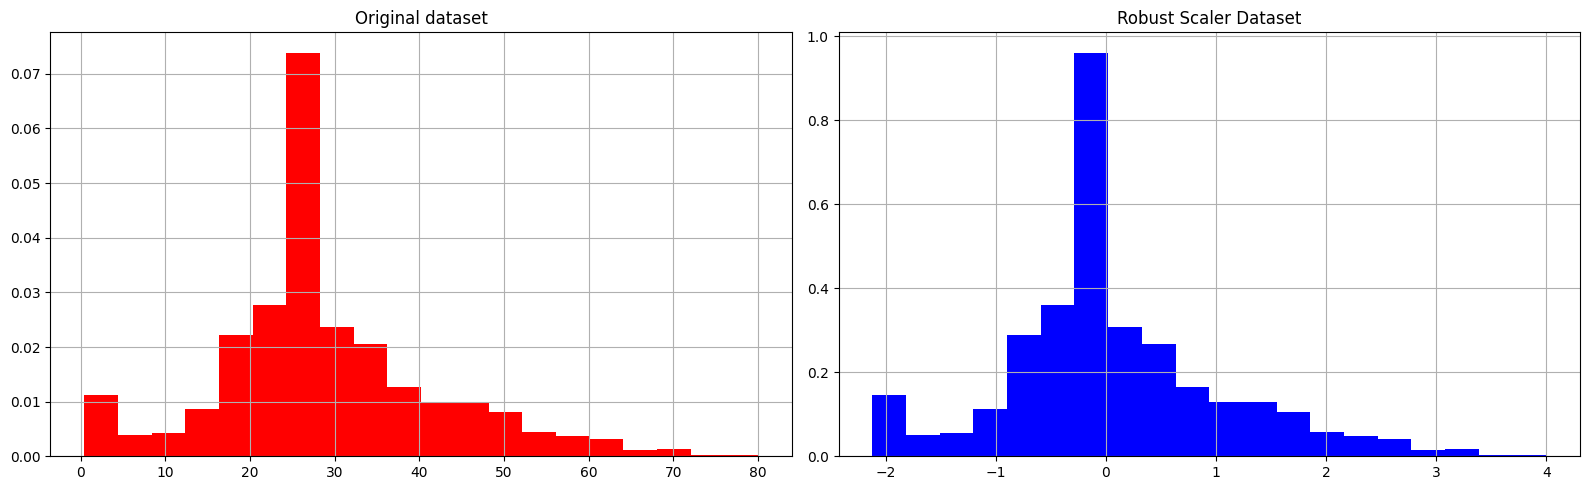

In [32]:
# Creating Histograms of 'Age' and it's Robust version

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
df['Age'].hist(bins=20, density=True, color='red')
plt.title("Original dataset")
plt.subplot(1,2,2)
df_robust_scaler['Age'].hist(bins=20, density=True, color='blue')
plt.title("Robust Scaler Dataset")
plt.tight_layout()

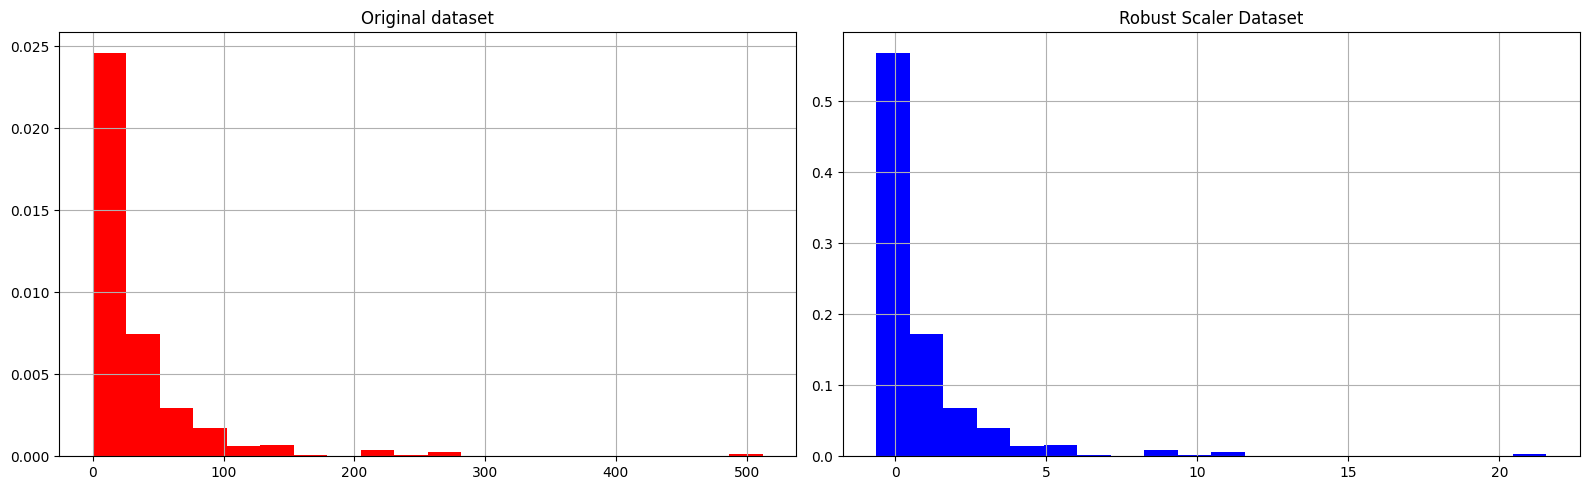

In [33]:
# Creating Histograms of 'Fare' and it's Robust version

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
df['Fare'].hist(bins=20, density=True, color='red')
plt.title("Original dataset")
plt.subplot(1,2,2)
df_robust_scaler['Fare'].hist(bins=20, density=True, color='blue')
plt.title("Robust Scaler Dataset")
plt.tight_layout()

### 4. Gaussian Transformation

- The main purpose of using this type of transformation is that ML algorithms such as **Linear and Logistic** assumes that the features are normally distributed. From normally distributed data, they provide better performance. Hence, the following techniques are applied in order to make the features normally/Gaussian distributed.

    - a. Logarithmic Transformation
    - b. Reciprocal Transformation
    - c. Square Root Transformation
    - d. Exponential Transformation
    - e. Box Cox Transformation

In [34]:
# Let's drop the 'Pclass' column

df.drop('Pclass', inplace = True, axis = 1)
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


**QQ Plots are used in order to check whether a distribution is normal or Gaussian**

In [35]:
# importing libraries

import scipy.stats as stat
import pylab

In [36]:
# Creating a function for data plotting

def plot_data(df, feature):
    plt.figure(figsize = (10,6))
    #(1st row, 2nd column, 1st index)
    plt.subplot(1,2,1)
    df[feature].hist()
    
    #(1st row, 2nd column, 2nd index)
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

### Doing all the transformation with the column Age

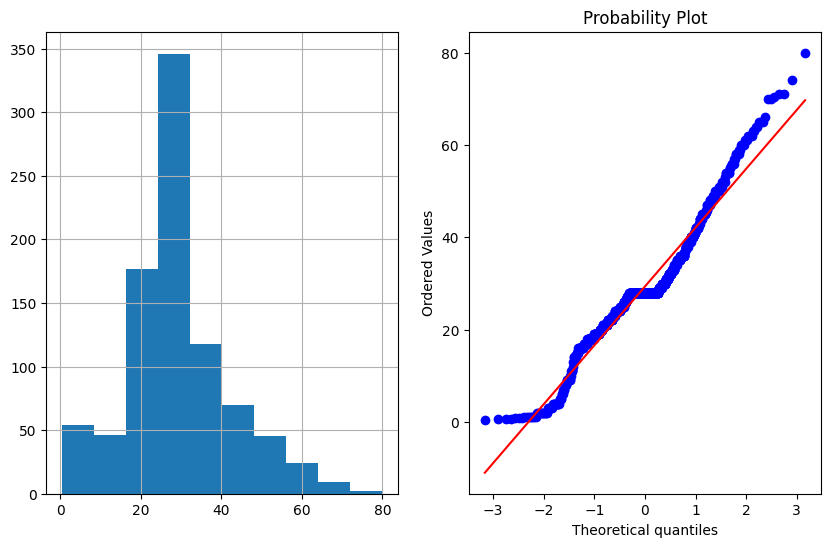

In [37]:
# Let's Create the Plot for column 'Age'

plot_data(df, 'Age')

**If the plot points fall within the red lines, then the feature is normally distributed**

#### a. Logarithmic Transformation

In [38]:
# Creating a logrithmic series of the 'Age' column

df['Age_log'] = np.log(df['Age'])

df['Age_log']

0      3.091042
1      3.637586
2      3.258097
3      3.555348
4      3.555348
         ...   
886    3.295837
887    2.944439
888    3.332205
889    3.258097
890    3.465736
Name: Age_log, Length: 891, dtype: float64

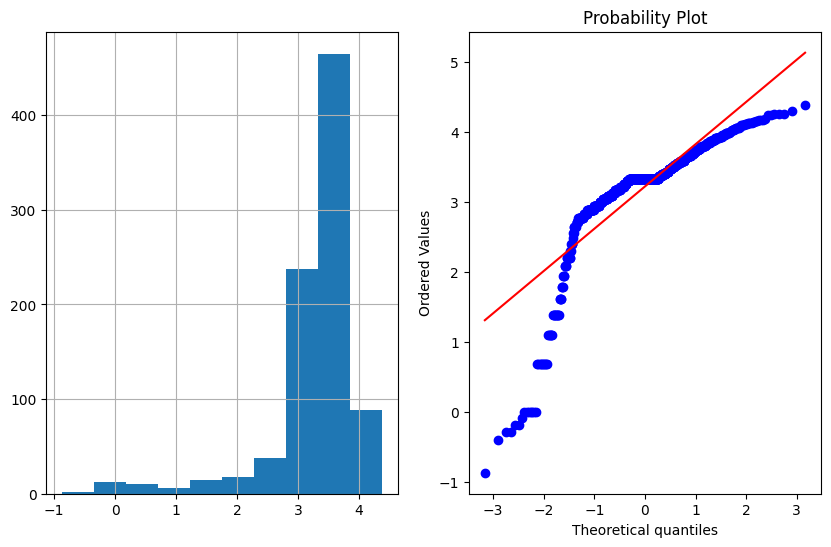

In [39]:
# Now plotting the data

plot_data(df,'Age_log')

#### b. Reciprocal Transformation

In [40]:
# Creating a reciprocal series of the 'Age' column

df['Age_reciprocal'] = 1/df['Age']

df['Age_reciprocal']

0      0.045455
1      0.026316
2      0.038462
3      0.028571
4      0.028571
         ...   
886    0.037037
887    0.052632
888    0.035714
889    0.038462
890    0.031250
Name: Age_reciprocal, Length: 891, dtype: float64

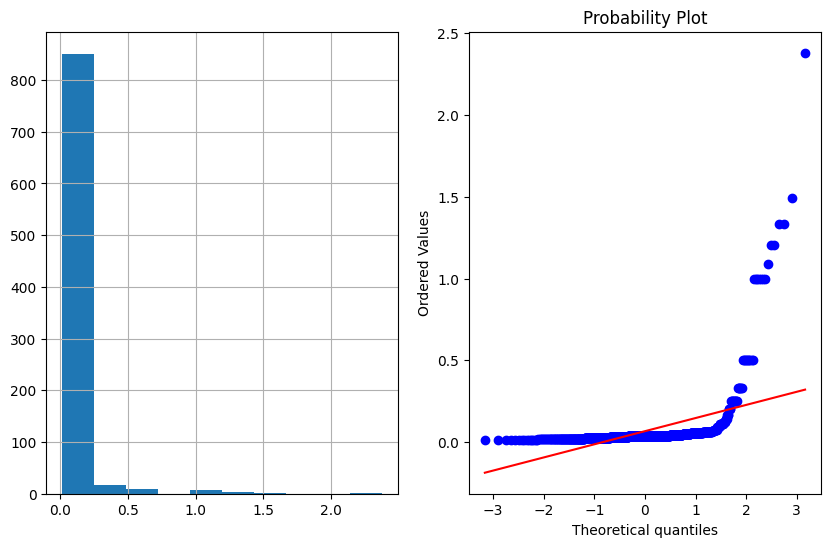

In [41]:
# Now plotting the data

plot_data(df,'Age_reciprocal')

#### c. Square Root Transformation

In [42]:
# Creating a suared root series of the 'Age' column

df['Age_squared'] = df.Age**(1/2)

df['Age_squared']

0      4.690416
1      6.164414
2      5.099020
3      5.916080
4      5.916080
         ...   
886    5.196152
887    4.358899
888    5.291503
889    5.099020
890    5.656854
Name: Age_squared, Length: 891, dtype: float64

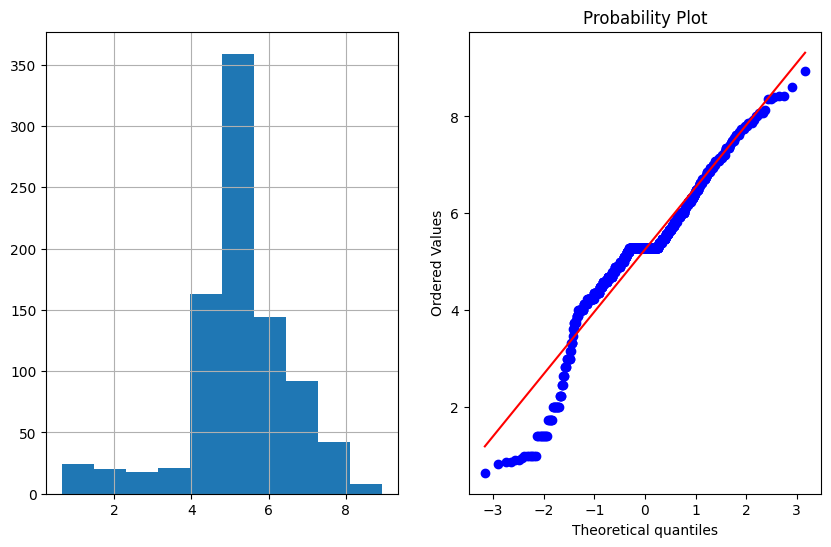

In [43]:
# Now plotting the data

plot_data(df,'Age_squared')

#### d. Exponential Transformation

In [44]:
# Creating a exponential series of the 'Age' column

df['Age_exp'] = df.Age**(1/1.2)

df['Age_exp']

0      13.142729
1      20.724608
2      15.105825
3      19.351889
4      19.351889
         ...    
886    15.588457
887    11.631293
888    16.068119
889    15.105825
890    17.959393
Name: Age_exp, Length: 891, dtype: float64

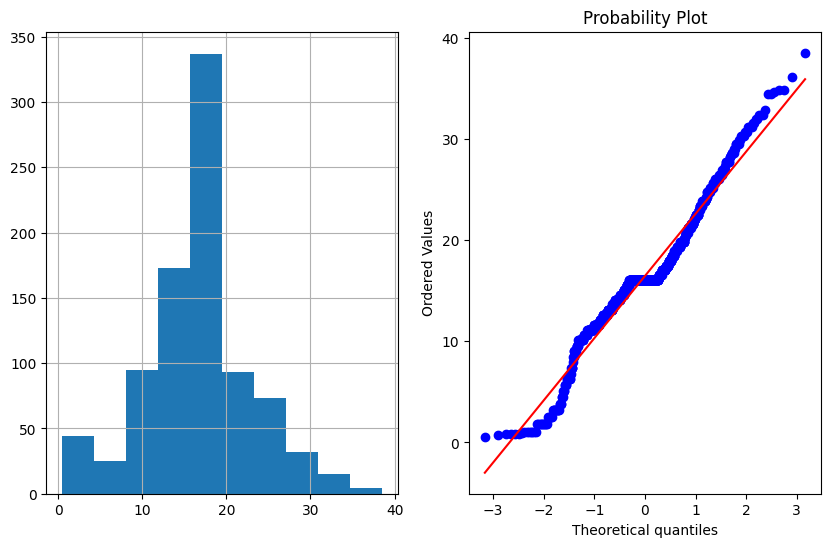

In [45]:
# Now plotting the data

plot_data(df,'Age_exp')

#### e. Box Cox Transformation

- The Box-Cox transformation is defined as:

- **`T(Y)=(Y exp(λ)−1)/λ`**

    - where 
    - **Y** is the response variable and 
    - **λ** is the transformation parameter. 
    - λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

    - λ = parameter

In [46]:
# Creating a boxcox series of the column "Age"

df['AgeBcox'],parameters = stat.boxcox(df['Age'])

df['AgeBcox']

0      13.468119
1      21.498728
2      15.563417
3      20.056110
4      20.056110
         ...    
886    16.076643
887    11.845513
888    16.586014
889    15.563417
890    18.588067
Name: AgeBcox, Length: 891, dtype: float64

In [47]:
# printing the parameter

print(parameters)

0.7964531473656952


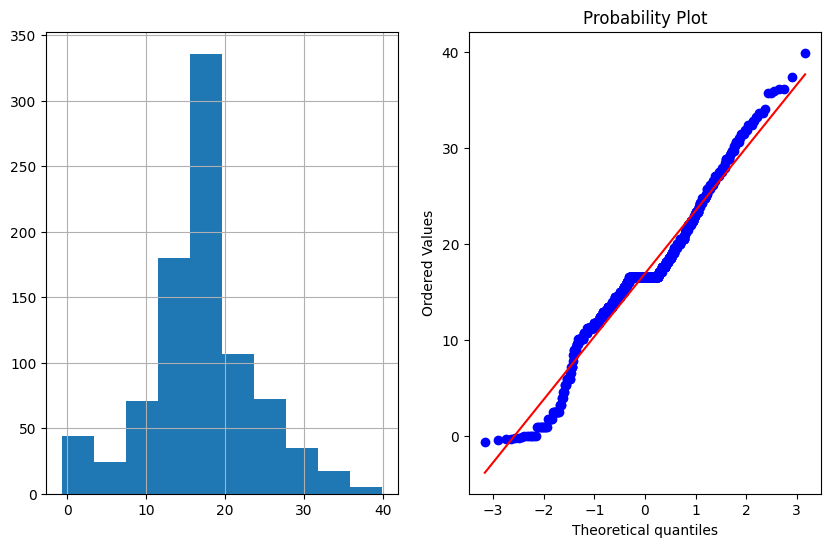

In [48]:
# Now creating the plot

plot_data(df, 'AgeBcox')

### Doing all the transformation with the column Fare

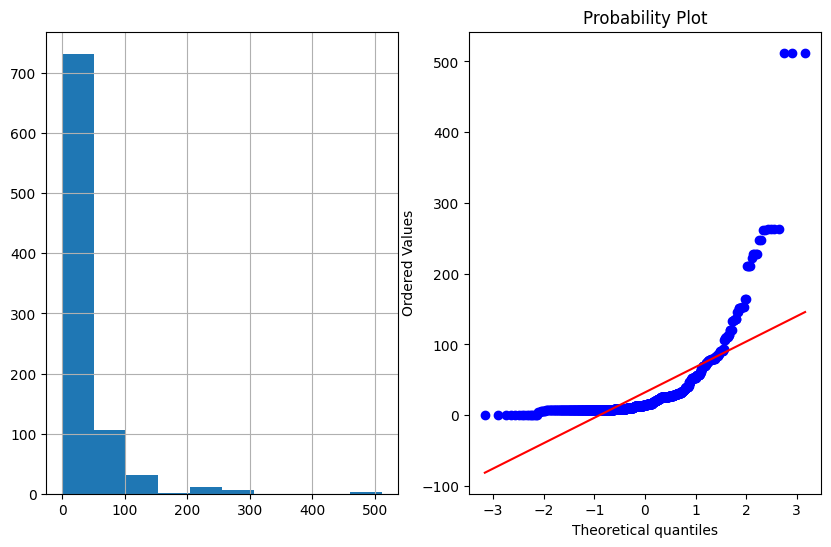

In [49]:
# Normal plot

plot_data(df, 'Fare')

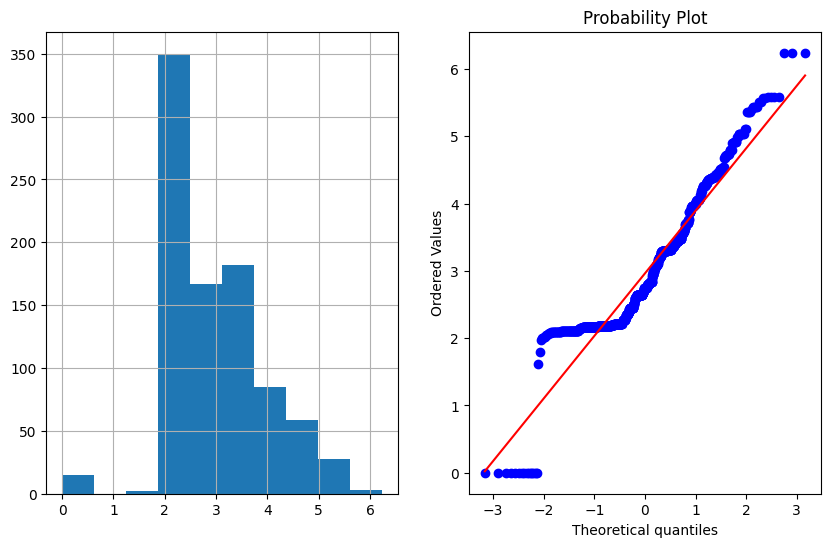

In [50]:
# Logrithmic plot

df['Fare_log'] = np.log1p(df['Fare'])
plot_data(df,'Fare_log')

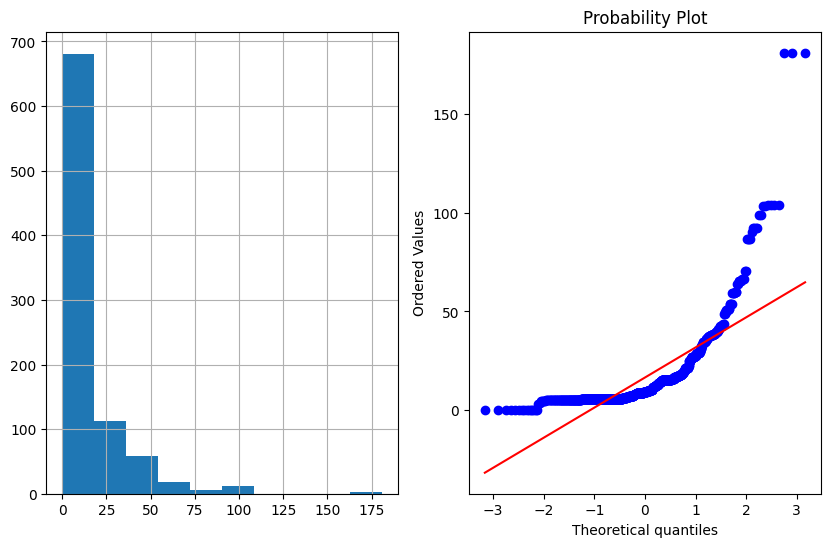

In [52]:
# Exponential plot

df['Fare_exp'] = df.Fare**(1/1.2)
plot_data(df, 'Fare_exp')

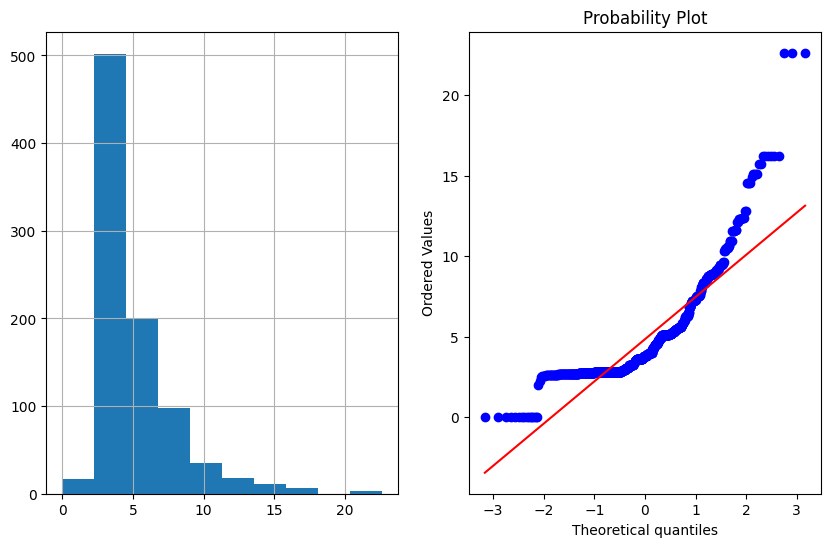

In [53]:
# Square Root plot

df['Fare_squared'] = df.Fare**(1/2)
plot_data(df,'Fare_squared')

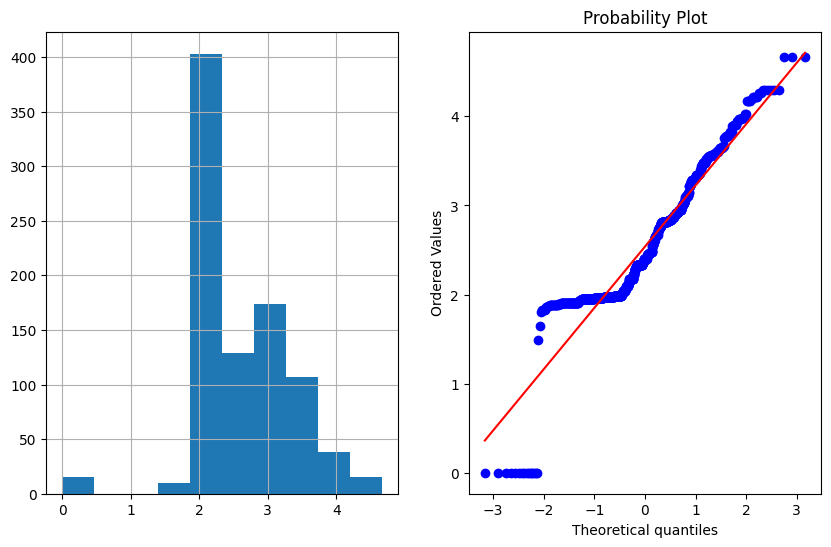

In [54]:
# Box Cox plot

df['FareBcox'],parameters = stat.boxcox(df['Fare']+1)
plot_data(df,'FareBcox')